In [46]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

#canteen_shop_data


## 1. Read the dataset

In [47]:
url = "https://raw.githubusercontent.com/FinTrack-BangkitCapstone2024/MachineLearning/main/Dataset/canteen_shop_data.csv"
ctn = pd.read_csv(url)
ctn.head()

,Date,Time,Item,Price,Quantity,Total,Customer ID,Payment Method,Employee ID,Customer Satisfaction,Weather,Special Offers
0,2024-04-01,12:15,Sandwich,4.5,2,9.0,1,Cash,101,4,Sunny,Yes
1,2024-04-01,12:30,Drink,1.5,1,1.5,2,Card,102,3,Sunny,No
2,2024-04-01,12:45,Salad,5.0,1,5.0,3,Mobile Payment,103,5,Cloudy,Yes
3,2024-04-01,13:00,Burger,5.5,1,5.5,4,Cash,104,4,Sunny,No
4,2024-04-01,13:15,Sandwich,4.5,1,4.5,5,Card,105,3,Sunny,Yes


## 2. Inspect the data

In [48]:
print("Dataset information:")
print(ctn.info())

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   200 non-null    object 
 1   Time                   200 non-null    object 
 2   Item                   200 non-null    object 
 3   Price                  200 non-null    float64
 4   Quantity               200 non-null    int64  
 5   Total                  200 non-null    float64
 6   Customer ID            200 non-null    int64  
 7   Payment Method         200 non-null    object 
 8   Employee ID            200 non-null    int64  
 9   Customer Satisfaction  200 non-null    int64  
 10  Weather                200 non-null    object 
 11  Special Offers         200 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 18.9+ KB
None


In [49]:
print("Dataset description:")
print(ctn.describe())

Dataset description:
            Price    Quantity       Total  Customer ID  Employee ID  \
count  200.000000  200.000000  200.000000   200.000000   200.000000   
mean     4.125000    1.365000    5.910000   100.500000   200.500000   
std      1.560143    0.482638    3.359813    57.879185    57.879185   
min      1.500000    1.000000    1.500000     1.000000   101.000000   
25%      3.750000    1.000000    4.125000    50.750000   150.750000   
50%      4.750000    1.000000    5.000000   100.500000   200.500000   
75%      5.125000    2.000000    9.000000   150.250000   250.250000   
max      5.500000    2.000000   11.000000   200.000000   300.000000   

       Customer Satisfaction  
count             200.000000  
mean                3.895000  
std                 0.785532  
min                 3.000000  
25%                 3.000000  
50%                 4.000000  
75%                 5.000000  
max                 5.000000  


## 3. Clean the data

In [50]:
# Convert the TransactionDate column to datetime format
ctn['Date'] = pd.to_datetime(ctn['Date'])

In [51]:
# Aggregate data by date to get total sales per day
daily_total_ctn = canteen.groupby('Date').sum()['Total']

# Create a new DataFrame with 'Date' and 'Total' columns
ctn_date_total = pd.DataFrame({'Date': daily_total_ctn.index, 'Total Sales': daily_total_ctn.values})
ctn_date_total.head()

,Date,Total Sales
0,1/1/2019,4745.1810
1,1/10/2019,3560.9490
2,1/11/2019,2114.9625
3,1/12/2019,5184.7635
4,1/13/2019,2451.2040


In [52]:
# Check for missing values
print("Number of missing values in each column:")
print(ctn_date_total.isnull().sum())

Number of missing values in each column:
Date           0
Total Sales    0
dtype: int64


## 4. Visualization

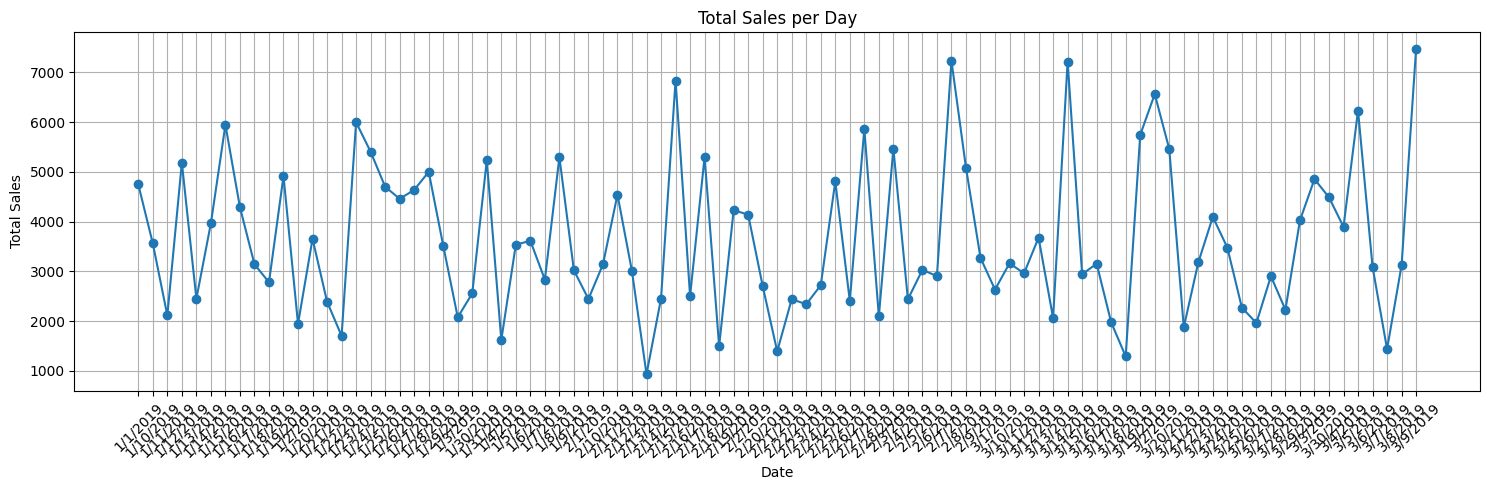

In [78]:
# Plot daily income/expenditure
plt.figure(figsize=(15, 5))
plt.plot(ctn_date_total['Date'],ctn_date_total['Total Sales'], marker='o')
plt.title('Total Sales per Day')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##5. Download File

In [54]:
# Save the result to a CSV file
ctn_date_total.to_csv("canteen_processed.csv", index=False)

# Download the CSV file
files.download('canteen_processed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#supermarket_sales


## 1. Read the dataset

In [55]:
url = "https://raw.githubusercontent.com/FinTrack-BangkitCapstone2024/MachineLearning/main/Dataset/supermarket_sales.csv"
spm = pd.read_csv(url)
spm.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## 2. Inspect the data

In [56]:
print("Dataset information:")
print(spm.info())

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gros

In [57]:
print("Dataset description:")
print(spm.describe())

Dataset description:
        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count              1000.000000   1000.000000  1000.00000  
mean                  4.761905     15.379369     6.97270  
std                   0.000000     11.708825     1.71858  
min                   4.761905      0.508500     4.00000  
25%                   4.76

## 3. Clean the data

In [58]:
# Convert the TransactionDate column to datetime format
spm['Date'] = pd.to_datetime(spm['Date'])

In [59]:
# Aggregate data by date to get total sales per day
daily_total_spm = spm.groupby('Date').sum()['Total']

# Create a new DataFrame with 'Date' and 'Total' columns
spm_date_total = pd.DataFrame({'Date': daily_total_spm.index, 'Total Sales': daily_total_spm.values})
spm_date_total.head()

,Date,Total Sales
0,2019-01-01,4745.1810
1,2019-01-02,1945.5030
2,2019-01-03,2078.1285
3,2019-01-04,1623.6885
4,2019-01-05,3536.6835


In [60]:
# Check for missing values
print("Number of missing values in each column:")
print(spm_date_total.isnull().sum())

Number of missing values in each column:
Date           0
Total Sales    0
dtype: int64


## 4. Visualization

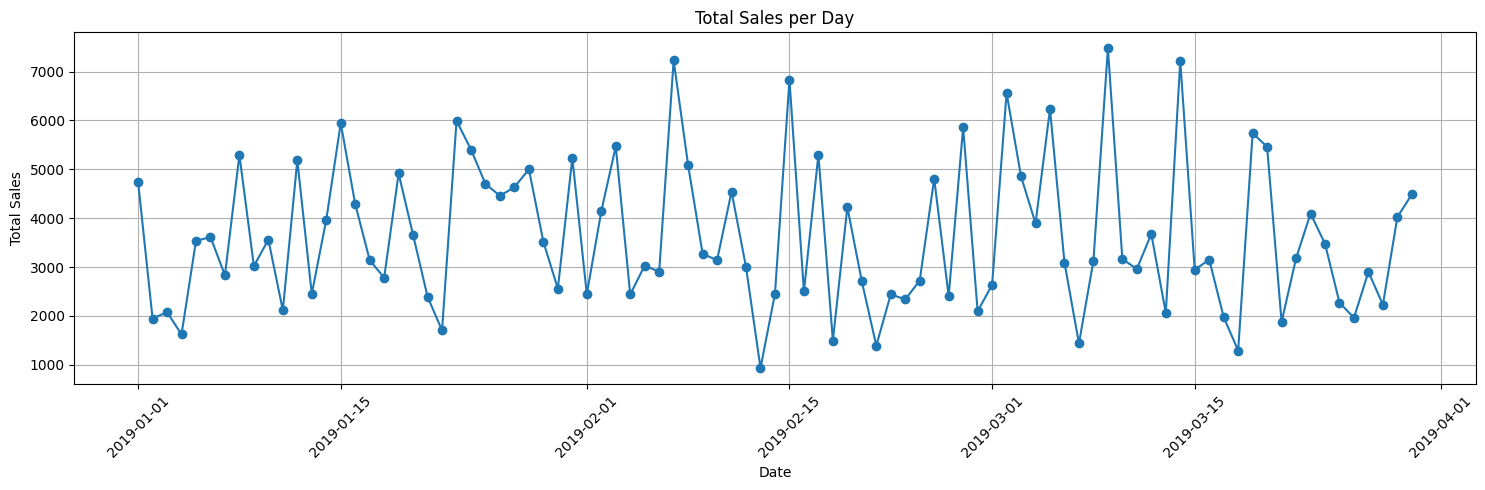

In [77]:
# Plot daily income/expenditure
plt.figure(figsize=(15, 5))
plt.plot(spm_date_total['Date'],spm_date_total['Total Sales'], marker='o')
plt.title('Total Sales per Day')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##5. Download File

In [62]:
# Save the result to a CSV file
spm_date_total.to_csv("supermarket_processed.csv", index=False)

# Download the CSV file
files.download('supermarket_processed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#customer_shopping_data

## 1. Read the dataset

In [63]:
url = "https://raw.githubusercontent.com/FinTrack-BangkitCapstone2024/MachineLearning/main/Dataset/customer_shopping_data.csv"
csp = pd.read_csv(url)
csp.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


## 2. Inspect the data

In [64]:
print("Dataset information:")
print(csp.info())

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB
None


In [65]:
print("Dataset description:")
print(csp.describe())

Dataset description:
                age      quantity         price
count  99457.000000  99457.000000  99457.000000
mean      43.427089      3.003429    689.256321
std       14.990054      1.413025    941.184567
min       18.000000      1.000000      5.230000
25%       30.000000      2.000000     45.450000
50%       43.000000      3.000000    203.300000
75%       56.000000      4.000000   1200.320000
max       69.000000      5.000000   5250.000000


## 3. Clean the data

In [71]:
# Convert the invoice_date column to datetime format with the specified format
csp['Date'] = pd.to_datetime(csp['invoice_date'], format='%d/%m/%Y')

In [73]:
# Aggregate data by date to get total sales per day
# Ensure to sum only the 'price' column to avoid issues with non-numeric columns
daily_total_csp = csp.groupby('Date')['price'].sum()

# Create a new DataFrame with 'Date' and 'Total Sales' columns
csp_date_total = pd.DataFrame({'Date': daily_total_csp.index, 'Total Sales': daily_total_csp.values})
csp_date_total.head()

,Date,Total Sales
0,2021-01-01,71524.88
1,2021-01-02,85257.90
2,2021-01-03,102892.65
3,2021-01-04,75425.08
4,2021-01-05,85855.16


In [74]:
# Check for missing values
print("Number of missing values in each column:")
print(csp_date_total.isnull().sum())

Number of missing values in each column:
Date           0
Total Sales    0
dtype: int64


## 4. Visualization

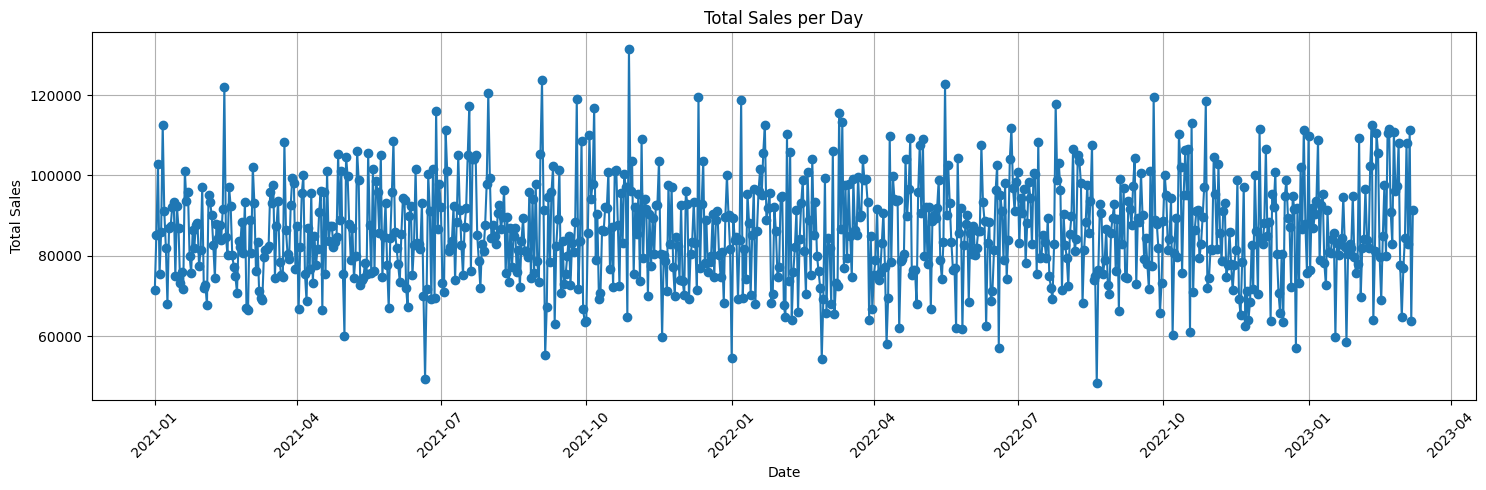

In [76]:
# Plot daily income/expenditure
plt.figure(figsize=(15, 5))
plt.plot(csp_date_total['Date'],csp_date_total['Total Sales'], marker='o')
plt.title('Total Sales per Day')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##5. Download File

In [79]:
# Save the result to a CSV file
csp_date_total.to_csv("customer_shopping_processed.csv", index=False)

# Download the CSV file
files.download('customer_shopping_processed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>